In [2]:
import numpy as np

data = np.loadtxt('data.txt')

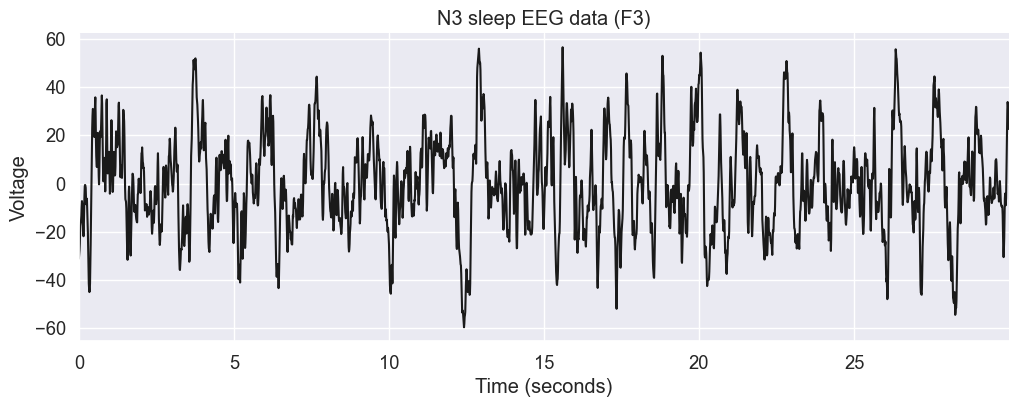

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2)

#Getting sampling frequency and the time vector
sf = 100. 
time = np.arange(data.size) / sf

# Plot the signal
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(time, data, lw=1.5, color='k')
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage')
plt.xlim([time.min(), time.max()])
plt.title('N3 sleep EEG data (F3)')
sns.despine()
plt.show()

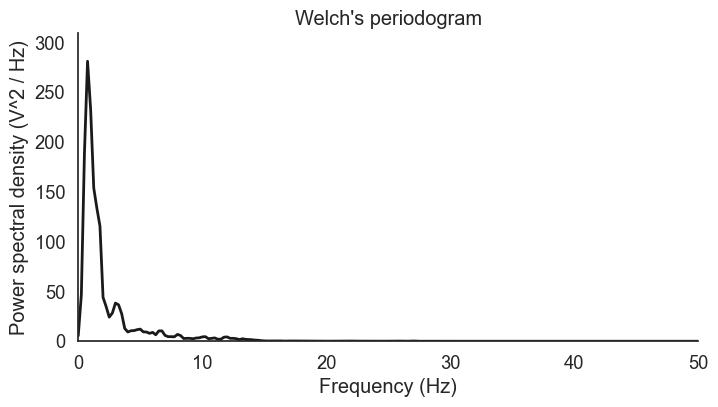

In [4]:
from scipy import signal

#Defining the window length
win = sf * 4 #We do 4 here because the formula for how long the window should be is 2/lowest_freq or 2/0.5=4
freqs, psd = signal.welch(data, sf, nperseg=win) #Welch uses a special technique of applying FFT using window size

#Plotting the power spectrum
sns.set(font_scale=1.2, style='white')
plt.figure(figsize=(8, 4))
plt.plot(freqs, psd, color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
plt.xlim([0, freqs.max()])
sns.despine()

The `freqs` vector contains the x-axis, frequency bins, and the `psd` vector contains the y-axis, power spectral density.

The unit is micro-Volts-squared per Hz

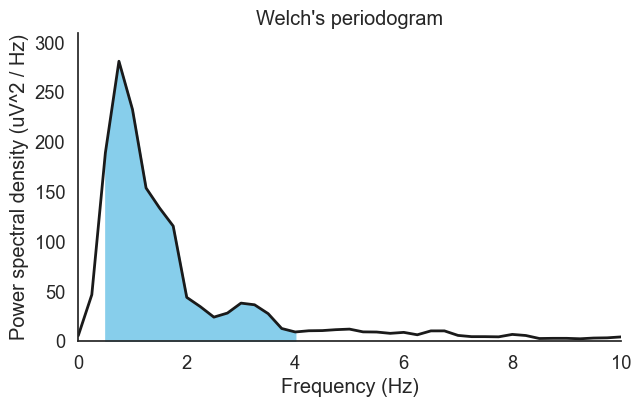

In [5]:
#Defining the delta band limits
low, high = 0.5, 4

#Finding intersecting values in frequency vector
idx_delta = np.logical_and(freqs >= low, freqs <= high)

#Plotting the spectral density
plt.figure(figsize=(7, 4))
plt.plot(freqs, psd, lw=2, color='k')
plt.fill_between(freqs, psd, where=idx_delta, color='skyblue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.xlim([0, 10])
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
sns.despine()

Now we will use simpson's rule to approxiate the area under the curve which is our bandpower. For us we are now trying to find the area of the blue graph above which will be our bandpower for the delta frequency.

In [9]:
from scipy.integrate import simpson

#Frequnency resolution
freq_res = freqs[1] - freqs[0] # = 1/4 = 0.25

# Compute the absolute bandpower by approximating the AUC
delta_power = simpson(psd[idx_delta], dx=freq_res)
print('Absolute delta power: %.3f uV^2' % delta_power)


Absolute delta power: 321.064 uV^2


In [10]:
#Reporting the relative bandpower as a percentage of total band power
total_power = simpson(psd, dx=freq_res)
delta_rel_power = delta_power / total_power
print('Relative delta power: %.3f' % delta_rel_power)

Relative delta power: 0.787
